# DEMO 3.1: **kMeans**
<u>Nội dung</u>:
1. Customer segmentation
2. Biểu diễn trực quan kết quả gom cụm (2D)

<u>Cập nhật</u>: **09/2025**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch3 - Unsupervised Learning'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
## Thư viện
import joblib             as jlb
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import seaborn            as sbn
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo

from collections          import Counter
from sklearn.cluster      import KMeans

---
## 1. **Customer segmentation**
---

In [ ]:
## Tập tin dữ liệu Shopping.csv
data = pd.read_csv(folder + '/Data/Shopping.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [ ]:
## Quan sát sơ bộ dữ liệu
print(data.groupby('Genre').Age.count())

Genre
Female    112
Male       88
Name: Age, dtype: int64


In [ ]:
## Chuyển thuộc tính [Genre] sang dạng số
data = pd.get_dummies(data, , dtype = 'int', drop_first = True) # thuộc tính nhị phân nên có thể bỏ 1 cột
print(data.head())

   CustomerID  Age  Annual Income  Spending Score  Genre_Male
0           1   19             15              39           1
1           2   21             15              81           1
2           3   20             16               6           0
3           4   23             16              77           0
4           5   31             17              40           0


In [ ]:
##------------------------------------------------------------------------------
## Xây dựng mô hình kMeans
##------------------------------------------------------------------------------
k     = 5
model = KMeans(n_clusters = k)
model.fit(data)  # xây dựng mô hình

KMeans(n_clusters=5)

In [ ]:
## Lưu trữ mô hình để khai thác về sau
jlb.dump(model, folder + '/Output/kMeans.mdl')

['/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch04 - Unsupervised Learning/Output/kMeans.mdl']

In [ ]:
## Khai thác mô hình đã được xây dựng
model = jlb.load(folder + '/Output/kMeans.mdl')

In [ ]:
## Các trọng tâm
print(f'*** {k} trọng tâm:')
print(model.cluster_centers_)

*** 5 trọng tâm:
[[ 89.47058824  43.91176471  56.58823529  50.04411765   0.44117647]
 [162.          32.69230769  86.53846154  82.12820513   0.46153846]
 [162.          40.39473684  87.          18.63157895   0.52631579]
 [ 26.28        26.04        27.6         76.84         0.4       ]
 [ 29.5         44.1         29.76666667  26.83333333   0.33333333]]


In [ ]:
## Kết quả gom cụm khách hàng
data['cluster'] = model.labels_
print(data.head(10))

print('\nKích thước các clusters:', Counter(model.labels_))
print('\n2 clusters lớn nhất:', Counter(model.labels_).most_common(2))

   CustomerID  Age  Annual Income  Spending Score  Genre_Male  cluster
0           1   19             15              39           1        4
1           2   21             15              81           1        3
2           3   20             16               6           0        4
3           4   23             16              77           0        3
4           5   31             17              40           0        4
5           6   22             17              76           0        3
6           7   35             18               6           0        4
7           8   23             18              94           0        3
8           9   64             19               3           1        4
9          10   30             19              72           0        3

Kích thước các clusters: Counter({0: 68, 1: 39, 2: 38, 4: 30, 3: 25})

2 clusters lớn nhất: [(0, 68), (1, 39)]


---
## 2. **Biểu diễn trực quan kết quả gom cụm (2D)**
---

In [ ]:
## Tập tin dữ liệu Shopping.csv
data = pd.read_csv(folder + '/Data/Shopping.csv', usecols = ['Annual Income', 'Age'])

In [ ]:
## Xây dựng mô hình kMeans
k     = 4
model = KMeans(n_clusters = k)
model.fit(data)

KMeans(n_clusters=4)

In [ ]:
## Kết quả gom cụm khách hàng
centroids       = model.cluster_centers_
data['cluster'] = model.labels_
print(data.head(10))

print('\nKích thước các clusters:', Counter(model.labels_))
print('\nClusters lớn nhất:', Counter(model.labels_).most_common(1))

   Age  Annual Income  cluster
0   19             15        1
1   21             15        1
2   20             16        1
3   23             16        1
4   31             17        1
5   22             17        1
6   35             18        1
7   23             18        1
8   64             19        0
9   30             19        1

Kích thước các clusters: Counter({3: 73, 0: 54, 1: 49, 2: 24})

Clusters lớn nhất: [(3, 73)]


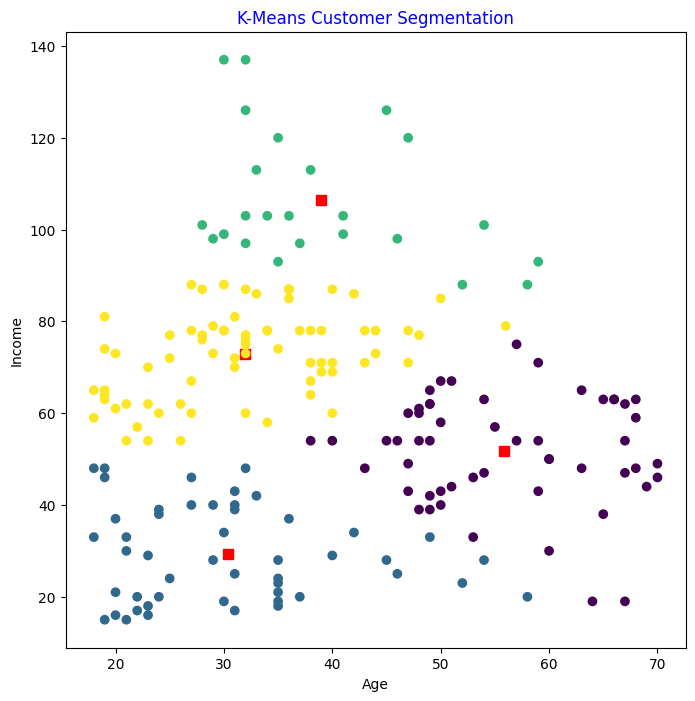

In [ ]:
## Biểu diễn trực quan
plt.figure(figsize = (8, 8))
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "s", s = 50, color = 'r')
plt.scatter(data.Age, data['Annual Income'], c = data.cluster)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("K-Means Customer Segmentation", color = "blue")
plt.show()